In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%pylab inline

figPath='/Users/kayhan/Dropbox/my Papers/DiffeomorphicFlow/AISTAT-2019/figures'

Populating the interactive namespace from numpy and matplotlib


/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


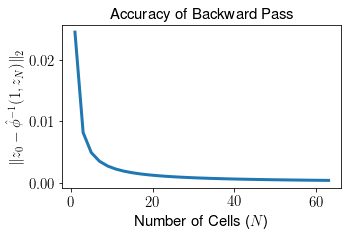

In [12]:
invQuality_df = pd.read_csv(figPath + '/inversion_quality.csv',sep=',')

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(5, 3)
plot(invQuality_df['itr'],invQuality_df['val'],linewidth=3)
ax.set_xlabel(r' Number of Cells ($N$)', fontsize=15)
#ax.set_ylabel(r'$\|z -  \phi(1,\phi^{-1}(1,z)) \|_2$',fontsize=15)
ax.set_ylabel(r'$\|z_0 -  \hat{\phi}^{-1}(1,z_N) \|_2$',fontsize=15)
ax.set_title(r'Accuracy of Backward Pass',fontsize=15)
ax.tick_params(labelsize=15)
fig.savefig(figPath + '/figInv.pdf',
           bbox_inches='tight')

/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


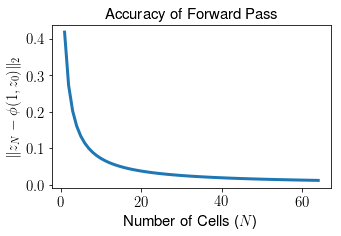

In [13]:
odeQuality_df = pd.read_csv(figPath + '/ode_approx.csv',sep=',')

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(5, 3)
plot(odeQuality_df['itr'],odeQuality_df['val'],linewidth=3)
ax.set_xlabel(r'Number of Cells ($N$)', fontsize=15)
ax.set_ylabel(r'$\|z_N - \phi(1,z_0)  \|_2$',fontsize=15)
ax.set_title('Accuracy of Forward Pass',fontsize=15)
ax.tick_params(labelsize=15)
fig.savefig(figPath + '/figODE.pdf',
           bbox_inches='tight')

# stability curves

In [24]:
var_df = pd.read_csv(figPath + '/stdCurve.csv',sep=',',skiprows=range(1, 10))
var_df.head()

,Step,first_order_no_reg,first_order_with_reg,second_order_no_reg,second_order_with_reg
0,2701,8.794572,8.111502,8.698708,7.192667
1,3001,1.083133,0.718068,0.291629,0.481782
2,3301,1.248760,0.260027,0.293423,0.490151
3,3601,1.532355,0.375268,0.272848,0.475377
4,3901,1.672134,0.382738,0.266205,0.474005


/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/kayhan/anaconda2/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.g

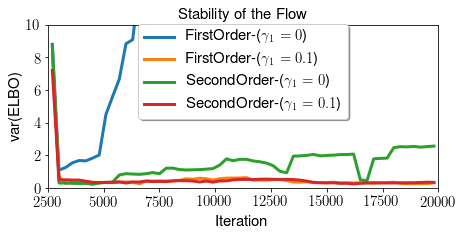

In [40]:
fig, ax = plt.subplots()
# the size of A4 paper
hold(True)
fig.set_size_inches(7, 3)
plot(var_df['Step'],var_df['first_order_no_reg'],
     linewidth=3,label=r'FirstOrder-($\gamma_1 = 0$)')
plot(var_df['Step'],var_df['first_order_with_reg'],
     linewidth=3,label=r'FirstOrder-($\gamma_1 = 0.1$)')
plot(var_df['Step'],var_df['second_order_no_reg'],
     linewidth=3,label=r'SecondOrder-($\gamma_1 = 0$)')
plot(var_df['Step'],var_df['second_order_with_reg'],
     linewidth=3,label=r'SecondOrder-($\gamma_1 = 0.1$)')
ax.axis([2500,20000,0,10])

ax.set_xlabel(r'Iteration', fontsize=15)
ax.set_ylabel(r'var(ELBO)',fontsize=15)
ax.set_title('Stability of the Flow',fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True, shadow=True,
          fontsize=15)
bbox_to_anchor=(0.5, 0., 0.5, 0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True, shadow=True,
          fontsize=15)

fig.savefig(figPath + '/stability.pdf',
           bbox_inches='tight')